In [36]:
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
# Pkg.update()

    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`

   Resolving package versions...


  No Changes to `C:\Users\VoidArchon\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\VoidArchon\.julia\environments\v1.8\Manifest.toml`

In [37]:
using Dragoon
using Plots
# using Dates

In [38]:
ref0 = [
      0.6037533702979441 - 0.7971711659699691im,
    -0.49152420239804373 - 0.8708639150045079im,
     -0.9446107215621984 - 0.3281929077687685im,
     -0.9846694945053195 + 0.1744304634822827im,
     -0.8136139156426136 + 0.5814055351238824im,
     -0.4751750303984411 + 0.8798912946982941im,
    0.007749561940184724 + 0.9999699716940137im,
      0.5325698378687111 + 0.8463860630896989im,
      0.9042152260421181 + 0.4270770714913185im,
      0.9965552817110883 - 0.08293111897068542im,
];

ref1 = [
  0.9240607675676515 - 0.38224559885263165im,
  0.7380980822551304 - 0.674693427395952im,
  0.462948064022487 - 0.8863854071552547im,
  0.14786245633322903 - 0.9890079342488161im,
  -0.15586000240126052 - 0.9877791553031501im,
  -0.41490614421034666 - 0.9098642159665684im,
  -0.617404400711767 - 0.7866459216074747im,
  -0.7658156811116661 - 0.6430601391498648im,
  -0.8687939779605591 - 0.49517373098685186im,
  -0.9360561794775265 - 0.3518505774642497im,
  -0.9761192037376331 - 0.21723558662114203im,
  -0.9956895298891584 - 0.09274890872183986im,
  -0.9997664170139217 + 0.02161276037728511im,
  -0.9919648735330898 + 0.12651359482877816im,
  -0.9748503346892108 + 0.2228605504711954im,
  -0.9502174864493367 + 0.3115874330679862im,
  -0.9193032370696224 + 0.393549943861387im,
  -0.8829429833546631 + 0.46948023189991367im,
  -0.8416837189379979 + 0.5399708485415708im,
  -0.7958656259972035 + 0.6054732903737947im,
  -0.7456820601606868 + 0.6663019324259252im,
  -0.6912243153190141 + 0.7226402603728616im,
  -0.6325172274726643 + 0.7745462910312649im,
  -0.5695479277801538 + 0.8219581242139662im,
  -0.5022919227600631 + 0.8646981116725166im,
  -0.4307376970992456 + 0.9024771666350553im,
  -0.35491058222663224 + 0.9349002506275896im,
  -0.2748980884521972 + 0.9614733698679944im,
  -0.19087567409544032 + 0.9816142200674294im,
  -0.10313357313905225 + 0.9946675153495173im,
  -0.012103106793501572 + 0.9999267547205412im,
  0.08161873838943179 + 0.9966636250730342im,
  0.1772493286384882 + 0.9841659796483582im,
  0.27380786206107666 + 0.9617844117439002im,
  0.3701142439384575 + 0.9289862466333114im,
  0.46480279904208954 + 0.8854142296138187im,
  0.5563540269667009 + 0.8309453632327204im,
  0.6431457015941184 + 0.7657438256499466im,
  0.7235225589439993 + 0.6903007364179202im,
  0.7958805407946918 + 0.6054536850861058im,
  0.8587587180131229 + 0.512380195008022im,
  0.9109293743169278 + 0.4125623286323685im,
  0.9514758477257652 + 0.307723432962967im,
  0.9798484268083656 + 0.1997424854185147im,
  0.9958914606454912 + 0.09055494803379414im,
  0.9998389086057622 - 0.017948728033846926im,
  0.992280221622198 - 0.12401597388001956im,
  0.9741024265108893 - 0.2261071928657065im,
  0.946416901645635 - 0.32294743888049116im,
  0.9104801519376988 - 0.41355276921755146im,
]
;

In [39]:
n = 20

initdist = findpeak(22.025e9,n)

freqs = genFreqs(22.025e9,50e6; length=50)
freqsplot = genFreqs(22.025e9,150e6; length=1000)

booster = AnalyticalBooster(initdist)

hist = initHist(booster,10000,freqs,ObjRef1dSquare(ref1))
;

Objective Value: 105.7, Timestamp: 0000-01-01T00:00:00


In [48]:
T = collect(range(1; length=100001,stop=0))

trace = nelderMead(booster,hist,freqs,
            1.,1+2/n,0.75-1/2n,1-1/n,
            ObjRef1dLin(ref1),
            InitSimplexCoord(1e-6),
            DefaultSimplexSampler,
            UnstuckDont;
            maxiter=Int(1e4),
            showtrace=true,
            showevery=1000,
            unstuckisiter=true,
            resettimer=true)
;

Iter: 1000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 2000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 3000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 4000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 5000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 6000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 7000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 8000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 9000, timestamp: 2 seconds
Iter finished. Objective value: 52.611



Iter: 10000, timestamp: 2 seconds
Iter finished. Objective value: 52.611

Terminated. Max iterations reached.
Final objective value: 52.611
Elapsed movement time:  2 seconds
Summed movement time:   2 minutes, 30 seconds
Elapsed computing time: 27 seconds, 44 milliseconds


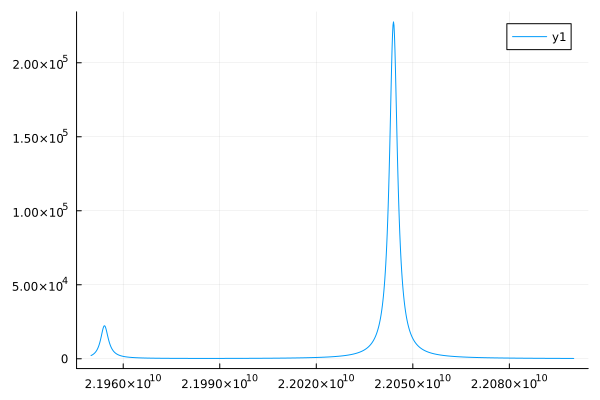

In [49]:
plot(freqsplot,getBoost1d(booster,freqsplot))

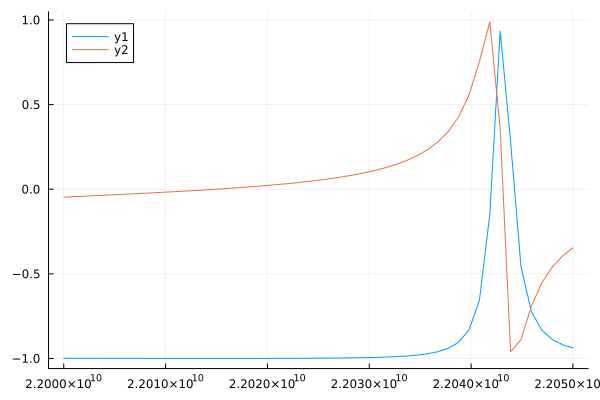

In [42]:
plot(freqs,real(Dragoon.getRef1d(booster,freqs)))
plot!(freqs,imag(Dragoon.getRef1d(booster,freqs)))

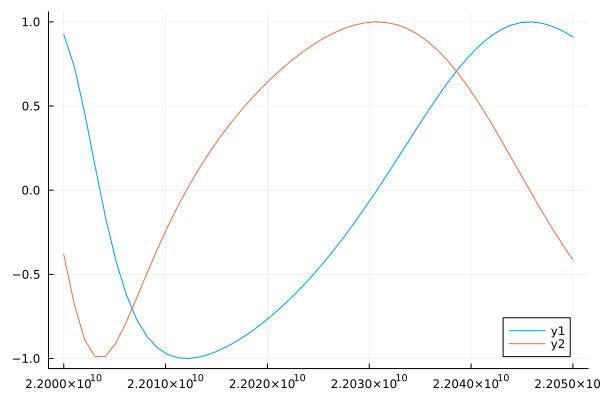

In [43]:
plot(freqs,real(ref1))
plot!(freqs,imag(ref1))

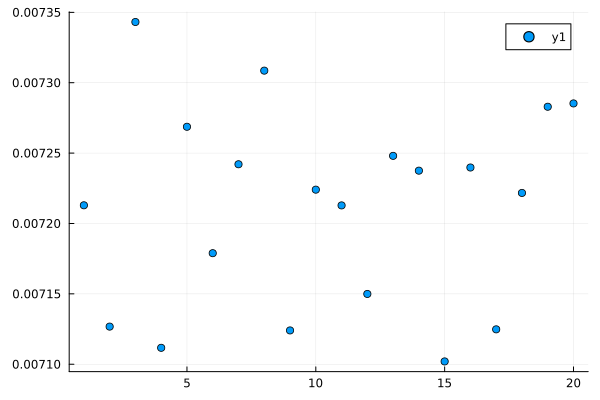

In [44]:
scatter(pos2dist(booster.pos))

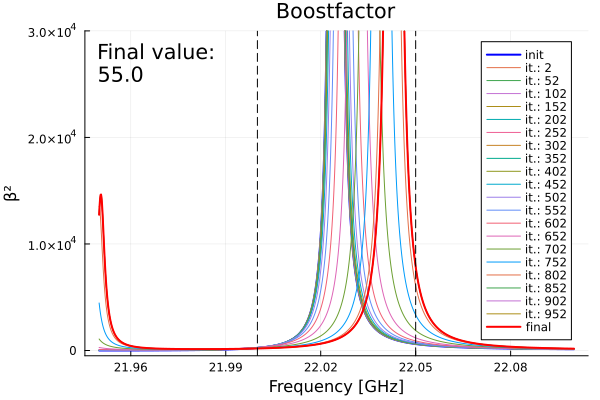

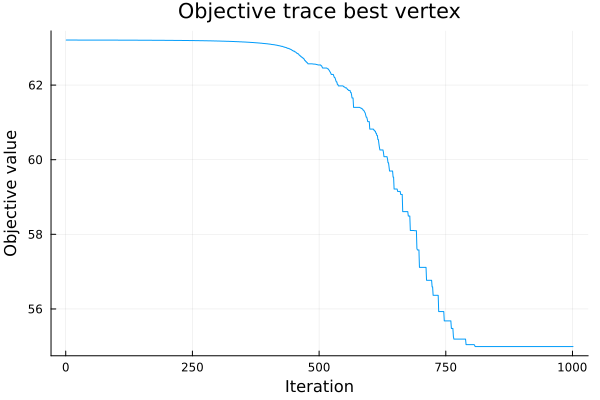

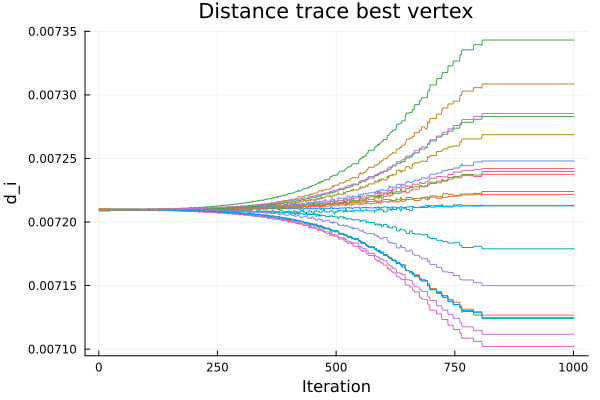

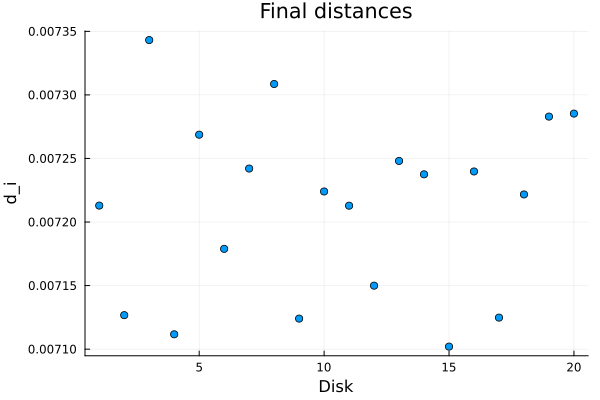

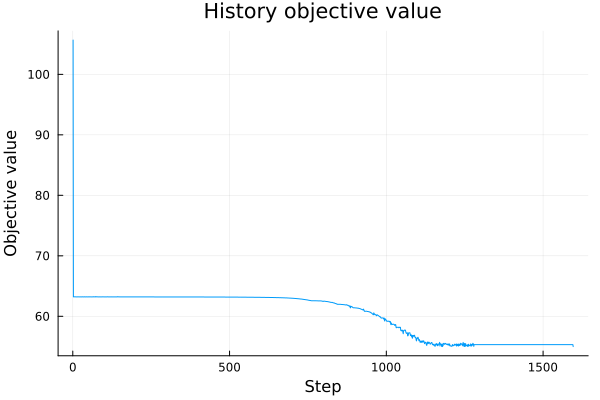

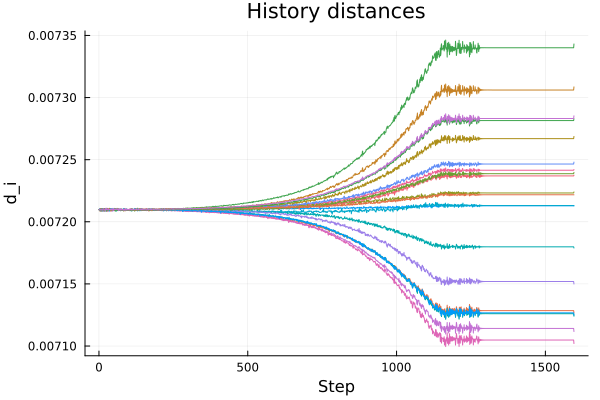

(Plot{Plots.GRBackend() n=23}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20})

In [45]:
analyse(hist,trace,freqsplot; freqs=freqs,div=20,scale=1e9,ylim=[-0.05e4,3e4])